# Задание практика №3

Практика 3: Задание аналогично заданию 2, но для представления документов используются вектора, которые показывают распределение тем коллекции в этом документе. По сути каждый признак - это тема, значение признака  в векторе - вероятность этой темы в этом документа. Для того. чтобы это сделать используем LDA. + Нужно посмотреть какие темы будут появлятся, что эти темы из себя представляют. Подсказка в файле

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Dataset

In [2]:
from sklearn.datasets import fetch_20newsgroups


train_data = fetch_20newsgroups(subset='train')
val_data = fetch_20newsgroups(subset='test')

len(train_data['data']), len(val_data['data'])

(11314, 7532)

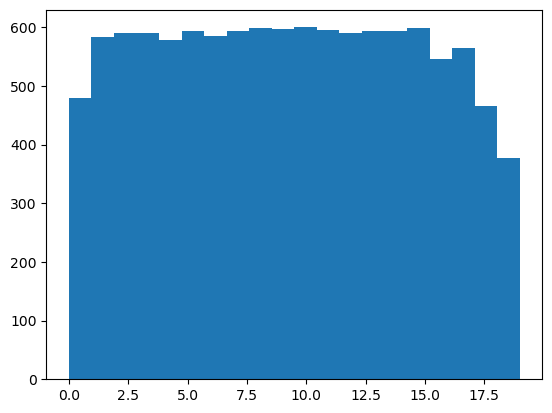

In [3]:
plt.hist(train_data['target'], bins=20)
None

## Text preprocessing

In [4]:
! pip install -qq spacy

In [5]:
from tqdm import tqdm
import re
from collections import Counter
from spacy.lang.en import stop_words


import nltk
from nltk.corpus import words
nltk.download('words')


DICT_WORDS_COUNT = 1000
stopwords = stop_words.STOP_WORDS

[nltk_data] Downloading package words to /Users/ktann/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [6]:
english_words_corpora = words.words()
len(english_words_corpora)

236736

In [7]:
def clean_text(text):

    if 'Lines:' in text:
        start = text.index('Lines:') + 5
        text = text[start:]

    text = text.lower()

    text = re.sub(r'[\w\d.]+@[\w\d]+.[\w\d]+', ' ', text)
    text = re.sub(r'(http|https)://[\w\d/.]+', ' ', text)

    text = re.sub(r'[^a-z]', ' ', text)

    text = re.sub(r'([^\w]|[-_])+', ' ', text)
    text = re.sub(r'\d+', ' ', text)
    text = re.sub(r'(.)\1{2,}', r'\1', text)
    text = re.sub(r'\s+', ' ', text)

    text = text.strip()
    
    words = [
        w for w in text.split() \
            if len(w) > 3 and \
                w not in stopwords and \
                w in english_words_corpora
    ]

    return ' '.join(words)

In [9]:
from random import randint, seed
import warnings
warnings.filterwarnings('ignore')

In [10]:
seed(4242)
samples1000 = list(filter(lambda it: randint(0, 9) == 0, zip(train_data['data'], train_data['target'])))
# samples1000 = list(zip(train_data['data'], train_data['target']))

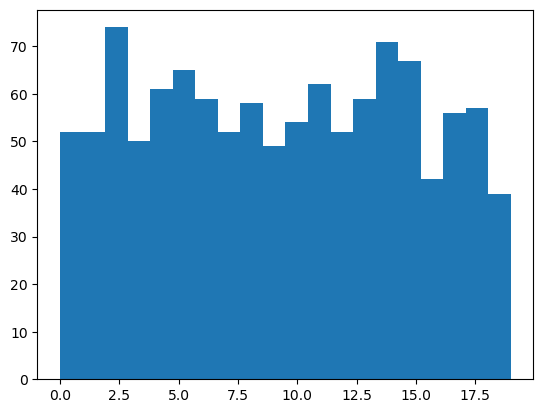

In [11]:
texts1000, targets1000 = zip(*samples1000)
plt.hist(targets1000, bins=20)
None

In [12]:
clean_train_texts = [
    clean_text(text) for text, target in tqdm(samples1000, desc='Train texts')
]

Train texts: 100%|██████████| 1131/1131 [01:37<00:00, 11.57it/s]


## LDA

In [13]:
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer
from gensim import corpora, models
from gensim.utils import simple_preprocess
from sklearn.feature_extraction.text import TfidfVectorizer

In [14]:
# Preprocess the text data and create a list of tokenized documents
tokenized_documents = [simple_preprocess(text) for text in clean_train_texts]

# Create a dictionary mapping of words to unique IDs
dictionary = corpora.Dictionary(tokenized_documents)

# Create a Bag of Words (BoW) representation of the documents
bow_corpus = [dictionary.doc2bow(doc) for doc in tokenized_documents]

In [15]:
# Create a TF-IDF model
tfidf = models.TfidfModel(bow_corpus)
corpus_tfidf = tfidf[bow_corpus]

In [16]:
lda_model = models.LdaModel(corpus_tfidf, num_topics=100, id2word=dictionary, passes=15)

for topic in lda_model.print_topics(num_words=5):
    print(topic)


document_topic_vectors = []
for doc_bow in corpus_tfidf:
    document_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0.0)
    document_topic_vector = [topic_prob for _, topic_prob in document_topics]
    document_topic_vectors.append(document_topic_vector)

(19, '0.000*"pollux" + 0.000*"leadoff" + 0.000*"yesterday" + 0.000*"bigot" + 0.000*"conine"')
(17, '0.030*"network" + 0.027*"blood" + 0.021*"brad" + 0.013*"possibility" + 0.013*"stolen"')
(12, '0.047*"access" + 0.037*"state" + 0.022*"expressed" + 0.018*"steven" + 0.010*"employer"')
(39, '0.000*"pollux" + 0.000*"leadoff" + 0.000*"yesterday" + 0.000*"bigot" + 0.000*"conine"')
(98, '0.010*"friendship" + 0.005*"surely" + 0.004*"offended" + 0.003*"striving" + 0.003*"complication"')
(60, '0.000*"pollux" + 0.000*"leadoff" + 0.000*"yesterday" + 0.000*"bigot" + 0.000*"conine"')
(30, '0.017*"penalty" + 0.013*"king" + 0.013*"temple" + 0.011*"guilty" + 0.009*"stratus"')
(47, '0.009*"interference" + 0.003*"manipulation" + 0.003*"boss" + 0.003*"ideological" + 0.002*"cultural"')
(10, '0.000*"pollux" + 0.000*"leadoff" + 0.000*"yesterday" + 0.000*"bigot" + 0.000*"conine"')
(43, '0.000*"pollux" + 0.000*"leadoff" + 0.000*"yesterday" + 0.000*"bigot" + 0.000*"conine"')
(82, '0.000*"pollux" + 0.000*"leadoff

In [17]:
document_topic_vectors = []

for i, doc_bow in enumerate(bow_corpus):
    document_topics = lda_model.get_document_topics(doc_bow, minimum_probability=0.0)
    document_topic_vector = [topic_prob for _, topic_prob in document_topics]
    document_topic_vectors.append(document_topic_vector)

    if i < 5:
        print(f"Document {i + 1} Topic Vector: {document_topic_vector}")

Document 1 Topic Vector: [0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.024710925, 0.000244353, 0.000244353, 0.024674812, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.024669854, 0.000244353, 0.000244353, 0.000244353, 0.15171635, 0.000244353, 0.067196384, 0.000244353, 0.000244353, 0.000244353, 0.02467251, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.0480154, 0.0818073, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.000244353, 0.35964513, 0.000244353, 0.000244353, 0.000244353, 0.025754353, 0.000244353, 0.023799868, 0.000244353, 0.000244353, 0.000244353, 0.024638465, 0.000244353, 0.0002

In [18]:
df = pd.DataFrame(document_topic_vectors)
df['target'] = targets1000
df

,0,1,2,3,4,5,6,7,8,9,...,91,92,93,94,95,96,97,98,99,target
0,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.024711,...,0.000244,0.000244,0.000244,0.000244,0.000244,0.000244,0.024802,0.000244,0.000244,4
1,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.000090,0.009102,...,0.000090,0.000090,0.000090,0.036164,0.009104,0.000090,0.026045,0.000090,0.000090,19
2,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,...,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,0.000588,12
3,0.000218,0.000218,0.000218,0.065498,0.000218,0.000218,0.000218,0.000218,0.000218,0.000218,...,0.000218,0.000218,0.000218,0.000218,0.000218,0.000218,0.120326,0.000218,0.000218,6
4,0.000238,0.027463,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,...,0.000238,0.000238,0.000238,0.000238,0.000238,0.000238,0.023982,0.000238,0.000238,17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1126,0.000484,0.000484,0.000484,0.000484,0.000484,0.000484,0.000484,0.000484,0.000484,0.000484,...,0.000484,0.000484,0.000484,0.048880,0.000484,0.000484,0.000484,0.000484,0.000484,15
1127,0.000334,0.000334,0.000334,0.000334,0.000334,0.000334,0.000334,0.000334,0.000334,0.000334,...,0.000334,0.000334,0.000334,0.000334,0.000334,0.000334,0.000334,0.000334,0.000334,8
1128,0.000625,0.000625,0.000625,0.000625,0.000625,0.000625,0.000625,0.000625,0.000625,0.063119,...,0.000625,0.000625,0.000625,0.000625,0.000625,0.000625,0.188135,0.000625,0.000625,2
1129,0.000560,0.000560,0.000560,0.000560,0.000560,0.000560,0.000560,0.000560,0.000560,0.000560,...,0.000560,0.000560,0.000560,0.112508,0.000560,0.000560,0.112507,0.000560,0.000560,5


## Training

In [19]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score

In [20]:
for md in [8, 16, 32, 64]:

    md = int(md)

    X_train, X_val, y_train, y_val = train_test_split(
        df.drop('target', axis=1),
        df['target'],
        test_size=0.2,
        shuffle=True,
        random_state=42,
    )
                
    clf = DecisionTreeClassifier(
        max_depth=md,
        random_state=42,
    )
    clf.fit(X_train, y_train)

    y_pred = clf.predict(X_val)
    acc = accuracy_score(y_val, y_pred)
    f1 = f1_score(y_val, y_pred, average='macro')

    print(f'max_depth={md:4d}    =>    acc={acc:.4f}, macro-f1={f1:.4f}')
    print()

max_depth=   8    =>    acc=0.1278, macro-f1=0.1243

max_depth=  16    =>    acc=0.1410, macro-f1=0.1449

max_depth=  32    =>    acc=0.1410, macro-f1=0.1437

max_depth=  64    =>    acc=0.1454, macro-f1=0.1455



In [21]:
! pip install -qq catboost

In [22]:
from catboost import CatBoostClassifier

In [23]:
X_train, X_val, y_train, y_val = train_test_split(
    df.drop('target', axis=1),
    df['target'],
    test_size=0.2,
    shuffle=True,
    random_state=42,
)
            
clf = CatBoostClassifier(
    iterations=2500,
    verbose=200,
)
clf.fit(
    X=X_train,
    y=y_train,
    eval_set=(X_val, y_val),
    early_stopping_rounds=100,
)

y_pred = clf.predict(X_val)
acc = accuracy_score(y_val, y_pred)
f1 = f1_score(y_val, y_pred, average='macro')

print()
print(f'acc={acc:.4f}, macro-f1={f1:.4f}')

Learning rate set to 0.075934
0:	learn: 2.9749174	test: 2.9882998	best: 2.9882998 (0)	total: 118ms	remaining: 4m 53s
200:	learn: 1.2821182	test: 2.5402804	best: 2.5402804 (200)	total: 11.8s	remaining: 2m 14s
400:	learn: 0.7776001	test: 2.4863475	best: 2.4863475 (400)	total: 23.2s	remaining: 2m 1s
Stopped by overfitting detector  (100 iterations wait)

bestTest = 2.477796727
bestIteration = 465

Shrink model to first 466 iterations.

acc=0.2467, macro-f1=0.2260
